# Philadelphia - Comparison of Redlining Maps and Multispectral Data

## Site Description EDIT!!!!

In this case study of Philadelphia, I will download satellite-based **multispectral**
data for the City of Philadelphia, and compare that to redlining maps and
results from the U.S. Census American Community Survey. This is to help answer 
the question of how might racism, water rights, or other societal forces have
influenced the distribution of urban green space in Philadelphia.

The multispectral data (HLS L30) will be used to look at a normalized spectral index 
(which is a relationship of two or more bands), specifically NDBI (Normalized 
Difference Built-Up Index) which .... Normalization is done to ... through...



Philadelphia was chosen as the site of choice because I went to Bryn Mawr
College for undergrad, which is just west of Philadelphia proper on the 'Main 
Line'. I spent a lot of time in Philadelphia as well as studying the city from
an architectural, histrocial, sociological, and anthropological perspectives for
my courses. There are racial and economic disparities in (and surrounding) 
the city as well as other persisting inequalities that can be seen in the 
built environment as well as social factors.

Looking at urban greenspaces compared to built up areas (amount of impervious surface),
in combination with the redlining spatial data ....

**Description of Philadelphia geographically/ location info, go into short
relevant history, then move into specific history or other items that are relevant to
the analysis and redlining / multispectral data**



Philadephia, like many other cities, has uneven access to urban greenspace that
is rooted in racial discrimination and other injustices going back to the
City Beautiful movement and New Deal era. The map above shows
the grid Denver is based on with 2 axes, going north to south is Broadway, and going west
to east is Colfax. The boxes or odd shapes within the boundary are urban 
greenspaces or parks, with some of the ones, such as Sloan's Lake on the far 
east border of the city, not being clearly outlined as parks. These outlines
show some of the major or flagship parks like Cheeseman Park (just north of Colfax
and just to the east of Broadway), Washington Park (slender rectangle south
of Colfax), and City Park ( north of Colfax, east of Broadway).

The practice of redlining in this movement and era used zoning ordinances 
and other policy (housing and insurance policy) to exclude low-income people who were 
predominately Black or of races and ethnicties other than White) and could 
only live and play in certain areas. Because parks were a large push of 
the City Beautiful Movement which was about increasing the city's prestige, 
the majority of the parks created were in upscale white neighborhoods
that paid higher property taxes. This was deliberate action taken by numerous people including
politicians, city planners, insurance people, people in real estate, etc. to
purposefully disinvest in non-White neighborhoods and areas. While there 
has been work to undo these redlining policies and create hopefully someday
equal access and use to urban greenspace- to this day those flagship parks
predominately still serve the city's most affluent groups of whom are White.
([What Shapes Uneven Access to Urban Amenities? Thick Injustice 
and the Legacy of Racial Discrimination in Denver’s 
Parks](https://collective.coloradotrust.org/wp-content/uploads/sites/2/2019/07/jper.pdf))

Further information about Philadelphia and redlining practices can also be found at:

*[]()

*[Mapping Inequality - Redlining in new Deal America - Philadelphia](
    https://dsl.richmond.edu/panorama/redlining/map/PA/Philadelphia/context#mapview=full&loc=11/40.0149/-75.1285)

(This resource also has further readings listed at the bottom of the context
 as well as providing the Redlining Map)


## Data Description EDIT!!!

There were two sources of data used for this project - Ecoregions and GBIF data. Ecoregions data is available via a shapefile which can be downloaded here . The GBIF data is for species occurances. Together, the two can convey the migration spatially and over time of a certain species (if that species' data is available from GBIF).

* Georectified Rasters and Spatial Data


<figure>
<img
src="https://s3.amazonaws.com/holc/tiles/PA/Philadelphia/1937/holc-scan.jpg"
alt="Redlining map from Philadelphia, PA courtesy of Mapping Inequality (Nelson and Winling (2023))" />
<figcaption aria-hidden="true">Redlining map from Philadelphia, PA courtesy
of Mapping Inequality (<span class="citation"
data-cites="nelson_mapping_2023">Nelson and Winling
(2023)</span>)</figcaption>
</figure>




* Multispectral Data

HLS L30 (Harmonized Landstat)

The data can vary depending on the day or days used. For example, certain days have 
signifcantly more cloud coverage and it is essentially useless to for this case 
study to pick that single day. It is best to get a 'clear' image or images where 
there is little to no cloud coverage for the best results. This would also apply 
to other possble conditions that would affect the image. There also will be 
differences in the image based on time of year - for the U.S. for example summer 
generally is best because that's usually when a lot of the vegetation is healthiest 
and would have the greatest % reflection....

Because this data laregly comes from 'professional' sources ( NASA and ) and gathered
through satellites, there should be a degree of trust in the data, but it also
depends how you are using it and what you are using it for. I am interested in 



### Data Citations:

Redlining - georectified rasters and spatial data:
* Nelson, Robert K, and LaDale Winling. 2023. “Mapping Inequality:
Redlining in New Deal America.” In *American Panorama: An Atlas of
United States History*, edited by Robert K Nelson and Edward L. Ayers.
<https://dsl.richmond.edu/panorama/redlining.>

HLSL30 Multispectral Data: 
* 

## Methods Description EDIT!!!

### Methods Citations:
* D’Ignazio, Catherine, and Lauren Klein. 2020. “2. Collect, Analyze,
Imagine, Teach.” In *Data Feminism*.

In [1]:
# Set Up Analysis Part 1 of 2
## Import packages that will help with...

# Reproducible file paths
import os # Reproducible file paths
import pathlib # Find the home folder
import re # Extract metadata from file names
import zipfile # Work with zip files
from io import BytesIO # Stream binary (zip) files
from glob import glob # Find files by pattern

# Find files by pattern
import numpy as np # Unpack bit-wise Fmask - Process bit-wise cloud mask- adjust images 
import matplotlib.pyplot as plt # Overlay pandas and xarry plots, Overlay raster and vector data
import requests # Request data over HTTP
import rioxarray as rxr # Work with geospatial raster data

# Work with tabular, vector, and raster data
import cartopy.crs as ccrs # CRSs (Coordinate Reference Systems)
import geopandas as gpd # work with vector data
import hvplot.pandas # Interactive tabular and vector data
import hvplot.xarray # Interactive raster
import pandas as pd # Group and aggregate
import xarray as xr # Adjust images
from rioxarray.merge import merge_arrays # Merge rasters

# Access NASA data
import earthaccess # Access NASA data from the cloud

In [2]:
# Set Up Analysis Part 2 of 2

# Define and create the project data directory
redlining_data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'redlining'
)
os.makedirs(redlining_data_dir, exist_ok=True)

In [3]:
# Check the location of the new data directory
redlining_data_dir

'/Users/briannagleason/earth-analytics/data/redlining'

/opt/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: /Users/briannagleason/earth-analytics/data/redlining/redlining/redlining.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


<Axes: >

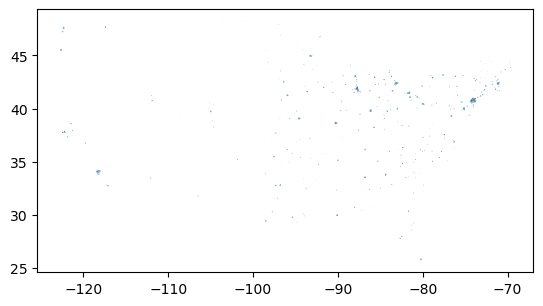

In [4]:
# Download Redlining Data Part 1 of 1

# Define info for redlining download
redlining_url = (
    "https://dsl.richmond.edu/panorama/redlining/static"
    "/mappinginequality.gpkg"
)
redlining_dir = os.path.join(redlining_data_dir, 'redlining')
os.makedirs(redlining_dir, exist_ok=True)
redlining_path = os.path.join(redlining_dir, 'redlining.shp')

# Only download once
if not os.path.exists(redlining_path):
    redlining_gdf = gpd.read_file(redlining_url)
    redlining_gdf.to_file(redlining_path)

# Load from file
redlining_gdf = gpd.read_file(redlining_path)

# Check the data
redlining_gdf.plot()

In [7]:
# Create an interactive site map, select data from Philadelphia
philadelphia_redlining_gdf = redlining_gdf[redlining_gdf.city=='Philadelphia']
philadelphia_redlining_gdf.dissolve().hvplot(
    geo=True, tiles='EsriImagery',
    title='City of Philadelphia',
    fill_color=None, line_color='darkorange', line_width=3,
    frame_width=600
)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

## Short Analysis of this plot

In [69]:
# Download Raster data through earthaccess Part 1 of 1

# login to earthaccess
earthaccess.login(strategy="interactive", persist=True)

# Search earthaccess
philadelphia_results = earthaccess.search_data(
    short_name="HLSL30",
    bounding_box=tuple(philadelphia_redlining_gdf.total_bounds),
    temporal=("2024-07-17", "2024-07-18")
)
philadelphia_results

# Open earthaccess results
philadelphia_files = earthaccess.open(philadelphia_results)

QUEUEING TASKS | :   0%|          | 0/30 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/30 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/30 [00:00<?, ?it/s]

In [73]:
# Check philadelphia_files by calling it
philadelphia_files

[<File-like object HTTPFileSystem, https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TVK.2024199T153924.v2.0/HLS.L30.T18TVK.2024199T153924.v2.0.Fmask.tif>,
 <File-like object HTTPFileSystem, https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TVK.2024199T153924.v2.0/HLS.L30.T18TVK.2024199T153924.v2.0.VAA.tif>,
 <File-like object HTTPFileSystem, https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TVK.2024199T153924.v2.0/HLS.L30.T18TVK.2024199T153924.v2.0.SZA.tif>,
 <File-like object HTTPFileSystem, https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TVK.2024199T153924.v2.0/HLS.L30.T18TVK.2024199T153924.v2.0.B10.tif>,
 <File-like object HTTPFileSystem, https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T18TVK.2024199T153924.v2.0/HLS.L30.T18TVK.2024199T153924.v2.0.B01.tif>,
 <File-like object HTTPFileSystem, https://data.lpdaac.ear

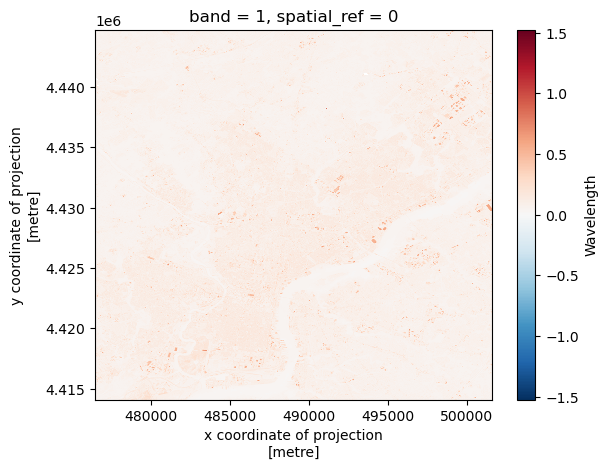

In [74]:
# Process Raster Image Part 1 of 2

# Create function with description to process raster images
def process_image(uri, bounds_gdf):
    """
    Load, crop, and scale a raster image from earthaccess

    Parameters
    ----------
    uri: file-like or path-like
      File accessor downloaded or obtained from earthaccess
    bounds_gdf: gpd.GeoDataFrame
      Area of interest to crop to

    Returns
    -------
    cropped_da: rxr.DataArray
      Processed raster
    """

    # Connect to the raster image
    da = rxr.open_rasterio(uri, mask_and_scale=True).squeeze()

    # Get the study bounds
    bounds = (
    bounds_gdf
    .to_crs(da.rio.crs)
    .total_bounds 
    )

    # Crop 
    cropped_da = (
    da.rio.clip_box(*bounds)
    )
    
    return cropped_da


# Test the function
process_image(philadelphia_files[7],philadelphia_redlining_gdf).plot(
    cbar_kwargs={"label": "Wavelength"},
    
)

/var/folders/sy/dpb41wnn0w76w40gwfy01bv80000gn/T/ipykernel_29406/859388737.py:33: RuntimeWarning: invalid value encountered in cast
  .astype('uint8')


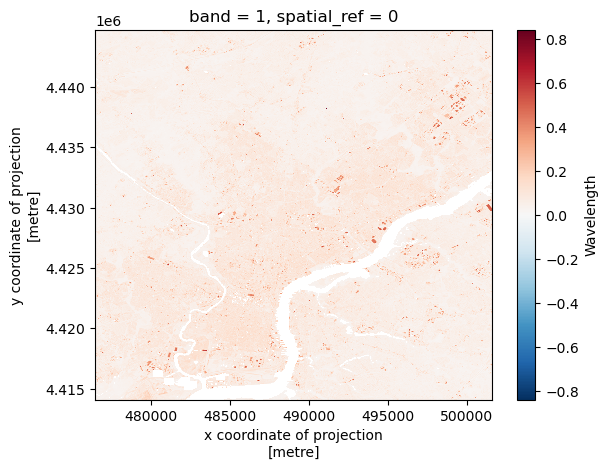

In [75]:
# Process Raster Image Part 2 of 2

# Create function with description to process the cloud mask
def process_cloud_mask(cloud_uri, bounds_gdf, bits_to_mask):
    """
    Load an 8-bit Fmask file and process to a boolean mask

    Parameters
    ----------
    uri: file-like or path-like
      Fmask file accessor downloaded or obtained from earthaccess
    bounds_gdf: gpd.GeoDataFrame
      Area of interest to crop to
    bits_to_mask: list of int
      The indices of the bits to mask if set

    Returns
    -------
    cloud_mask: np.array
      Cloud mask
    """

    # Open fmask file 
    fmask_da = process_image(cloud_uri, bounds_gdf)

    # Unpack the cloud mask bits
    cloud_bits = (
    np.unpackbits(
        (
            # Get the cloud mask as an array...
            fmask_da.values
            # ... of 8-bit integers
            .astype('uint8')
            # With an extra axis to unpack the bits into
            [:, :, np.newaxis]
        ), 
        # List the least significant bit first to match the user guide
        bitorder='little',
        # Expand the array in a new dimension
        axis=-1)
    )
    
    bits_to_mask = [
    1, # Cloud
    2, # Adjacent to cloud
    3, # Cloud shadow
    5] # Water

    cloud_mask = np.sum(
    # Select bits 
    cloud_bits[:,:,bits_to_mask], 
    # Sum along the bit axis
    axis=-1
    # Check if any of bits 1, 2, or 3 are true
    ) == 0

    return cloud_mask


#  Define Philadelphia cloud mask
philadelphia_cloud_mask = process_cloud_mask(
    philadelphia_files[0], 
    philadelphia_redlining_gdf, 
    bits_to_mask= [1, 2, 3, 5] 
  )

# Test the function - chose a band and define that data array
blue_da = process_image(philadelphia_files[12], philadelphia_redlining_gdf)
blue_da.where(philadelphia_cloud_mask).plot(
    cbar_kwargs={"label": "Wavelength"},
    #xlabel="None", 
    #ylabel="None",
    #title="Philadelphia Blue Band with Cloud Mask"
)

In [63]:
# Compile a regular expression to search for metadata
uri_re = re.compile(
 r"HLS\.L30\.(?P<tile_id>T[0-9A-Z]+)\.(?P<date>\d+)T\d+\.v2\.0\."
 r"(?P<band_id>.+)\.tif"   
)

uri_re.search(philadelphia_files[-3].full_name).groupdict()

# Find all the metadata in the file name
philadelphia_uri_groups = [
    uri_re.search(philadelphia_file.full_name).groupdict()
    for philadelphia_file in philadelphia_files]

# Create a DataFrame with the metadata
philadelphia_raster_df = pd.DataFrame(philadelphia_uri_groups)

# Add the File-like URI to the DataFrame
philadelphia_raster_df['file'] = philadelphia_files
# Check the results
philadelphia_raster_df

,tile_id,date,band_id,file
0,T18TVK,2024199,Fmask,"<File-like object HTTPFileSystem, https://data..."
1,T18TVK,2024199,VAA,"<File-like object HTTPFileSystem, https://data..."
2,T18TVK,2024199,SZA,"<File-like object HTTPFileSystem, https://data..."
3,T18TVK,2024199,B10,"<File-like object HTTPFileSystem, https://data..."
4,T18TVK,2024199,B01,"<File-like object HTTPFileSystem, https://data..."
...,...,...,...,...
415,T18TVK,2024303,SZA,"<File-like object HTTPFileSystem, https://data..."
416,T18TVK,2024303,Fmask,"<File-like object HTTPFileSystem, https://data..."
417,T18TVK,2024303,B03,"<File-like object HTTPFileSystem, https://data..."
418,T18TVK,2024303,B06,"<File-like object HTTPFileSystem, https://data..."


In [ ]:
# Labels for each band to process
bands = {
    'B02': 'blue',
    'B03': 'green',
    'B04': 'red',
    'B05': 'nir',
    'B06': 'swir1',
    'B07': 'swir2',
}
# Initialize structure for saving images
philadelphia_das = {band_name: [] for band_name in bands.values()}

for tile_id, tile_df in philadelphia_raster_df.groupby('tile_id'):

   # Load the cloud mask
   fmask_file = tile_df[tile_df.band_id=='Fmask'].file.values[0]
   cloud_mask = process_cloud_mask(
      fmask_file, 
      philadelphia_redlining_gdf, 
      [1, 2, 3, 5])
   

   for band_id, row in tile_df.groupby('band_id'):
        if band_id in bands:
            band_name = bands[band_id]
            print(band_id, band_name)
            # Process band
            band_da = process_image(row.file.values[0], philadelphia_redlining_gdf)
           
            # Mask band
            band_masked_da = band_da.where(cloud_mask)

            # Store the resulting DataArray for later
            philadelphia_das[band_name].append(band_masked_da)  

In [ ]:
# Merge all tiles
philadelphia_merged_das = {
   band_name: merge_arrays(das) 
    for band_name, das 
    in philadelphia_das.items()}

In [ ]:
# Plot a merged raster band
philadelphia_merged_das['green'].plot(
    cmap='Greens', 
    robust=True,
    cbar_kwargs={"label": "Color Bar"},
    )

# earlier notebook stuff need to figure out order

In [ ]:
# NDVI
ndvi_da = (
    (band_dict['nir']- band_dict['red'])
    /
    (band_dict['nir'] + band_dict['red'])
)

ndvi_da.plot(robust=True)

In [ ]:
# Try the formula above using SWIR1 NDBI
ndbi_da = (
    (band_dict['swir1']- band_dict['nir'])
    /
    (band_dict['swir1'] + band_dict['nir'])
)

ndbi_da.plot(robust=True)

In [ ]:
# Prepare the Plot 
# Reproject Denver to Mercator
philadelphia_redlining_plot_gdf = philadelphia_redlining_gdf.to_crs(ccrs.Mercator())

# Reproject NDVI data and band raster data to Mercator
ndvi_plot_da = ndvi_da.rio.reproject(ccrs.Mercator())


band_plot_dict = {
    name: da.rio.reproject(ccrs.Mercator())
    for name, da in band_dict.items()
    }

In [ ]:
ndvi_plot_da.plot(
    vmin=0, 
    robust=True,
    cmap='inferno',
    )

philadelphia_redlining_plot_gdf.plot(ax=plt.gca(), color='none')
plt.gca().set(
    title='Partial Denver Redlining using NDVI', 
    xlabel='',
    ylabel='',
    xticks=[], 
    yticks=[]
)

plt.show()

In [ ]:
# Create interactive plot
(
    ndvi_plot_da.hvplot(
        geo=True,
        xaxis=None, 
        yaxis=None,
        title='Interactive Denver Redlining using NDVI',
        cmap='Oranges'
    )
    * philadelphia_redlining_plot_gdf.hvplot(
        geo=True,
        crs=ccrs.Mercator(),
        fill_color=None,
        line_width=2
        )
)

In [ ]:
# Make interactive plots for red, nir, and green bands

raster_kwargs = dict(
    geo=True, robust=True, 
    xaxis=None, yaxis=None
)
(
    (
        band_plot_dict['red'].hvplot(
            cmap='Reds', title='Red Reflectance', **raster_kwargs)
        + band_plot_dict['nir'].hvplot(
            cmap='Greys', title='NIR Reflectance', **raster_kwargs)
        + band_plot_dict['green'].hvplot(
            cmap='Greens', title='Green Reflectance', **raster_kwargs)
    )
    * philadelphia_redlining_plot_gdf.hvplot(
        geo=True, crs=ccrs.Mercator(),
        fill_color=None)
)

In [ ]:
# Plotting a True Color Image

# Define the rgb data array
rgb_da = (
    xr.concat(
        [
            band_plot_dict['red'],
            band_plot_dict['green'],
            band_plot_dict['blue']
        ],
        dim='rgb')
)

# Use the stretch_rgb function with parameters and make descriptions
def stretch_rgb(rgb_da, low, high, brighten):
    """
    Short description: 
    Default images are too light/dark, stretch_rgb() can increase the visual contrast and brighten the image.

    Long description:
    Applies a linear stretch based on the low and high values, which are used as the endpoints.

    Parameters
    ----------
    rgb_da: array-like
      ?
    low: value/reference/output?
      Sets the low number endpoint for the stretch. The lower the number, the lighter the image.
    high: value/reference/output?
      Sets the high number endpoint for the stretch. The higher the number, the darker the image.
    brighten: value/reference/output?
      Brightens the image, range is from 0-1 with 0 being no added brightness and 1 being full brightness.
  
    Returns
    -------
    rgb_da: array-like
      ...?
    """
    # Adjust low, high and brighten numbers as needed
    p_low, p_high = np.nanpercentile(rgb_da, (low, high))
    rgb_da = (rgb_da - p_low)  / (p_high - p_low) + brighten
    rgb_da = rgb_da.clip(0, 1)
    return rgb_da

rgb_da = stretch_rgb(rgb_da, 3, 96, .1)

#rgb_da.plot.imshow(
    #rgb='rgb',
    #x:None, 
    #y:None,
    #title='True Color (3 band) Denver Image'
    #)
rgb_da.hvplot.rgb(
    geo=True, 
    x='x', 
    y='y', 
    bands='rgb',
    xaxis=None, 
    yaxis=None,
    title='True Color (3 band) Partial Denver Image'
 )

In [ ]:
# Plotting a False Color Image

# Define the rgb data array
cir_da = (
    xr.concat(
        [
            band_plot_dict['nir'] * .5,
            band_plot_dict['red'],
            band_plot_dict['green']
        ],
        dim='rgb')
)

cir_da = stretch_rgb(cir_da, 3, 96, .1)

#cir_da.plot.imshow(rgb='rgb')
cir_da.hvplot.rgb(
    geo=True, 
    x='x', 
    y='y', 
    bands='rgb',
    xaxis=None, 
    yaxis=None,
    title='False Color (3 band) Partial Denver Image',
    )

In [ ]:
# Define band labels
bands = {
    'B01': 'aerosol',
    'B02': 'blue',
    'B03': 'green',
    'B04': 'red',
    'B05': 'nir',
    'B06': 'swir1',
    'B07': 'swir2',
    'B09': 'cirrus',
    'B10': 'thermal1',
    'B11': 'thermal2'
}

band_dict = {}
band_paths = glob(os.path.join(hls_data_dir, '*.B*.tif'))
for band_path in band_paths:
    print(band_path)
    # Get the band number and name
    start_index = -7
    end_index = -4
    band_id = band_path[start_index:end_index]
    print(band_id)
    band_name = bands[band_id]
    print(band_name)

    # Open the band 
    band_da = rxr.open_rasterio(band_path, mask_and_scale=True). squeeze()
    masked_da = band_da.where(cloud_mask)
    display(masked_da)

    masked_da.plot()

    # Accumulate
    band_dict[band_name] = masked_da
    
band_dict